<a href="https://colab.research.google.com/github/FreshTuna/AE_GPS/blob/master/AutoEncoder_CNN_GPS_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir = "/content/drive/My Drive/WayPoint/FullData_Image/432-Image/Input-50/"

In [4]:
import os
import glob

os.chdir( data_dir )

files = glob.glob("*png")

In [5]:
import cv2

def get_im(path):
  img = cv2.imread(path, 0)
  resized = cv2.resize(img, (432, 432))
  return resized

In [6]:
X_train = []

i = 0
for fl in files:
    img = get_im(fl)
    X_train.append(img)

In [7]:
X_train = np.array(X_train)
X_train = X_train.astype( 'float32' ) / 255.
X_train = np.reshape( X_train, ( len( X_train ), 432, 432, 1 ) )

print(np.array(X_train).shape)

(58, 432, 432, 1)


In [8]:
Val_data_dir = "/content/drive/My Drive/WayPoint/FullData_Image/432-Image/"

In [9]:
os.chdir( Val_data_dir )

files = glob.glob("*png")

In [10]:
X_Val = [ ]

i = 0
for fl in files:
    img = get_im(fl)
    X_Val.append(img)

In [11]:
X_Val = np.array(X_Val)
X_Val = X_Val.astype( 'float32' ) / 255.
X_Val = np.reshape( X_Val, ( len( X_Val ), 432, 432, 1 ) )

print(np.array(X_Val).shape)

(58, 432, 432, 1)


In [12]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
import keras

In [13]:
input_img = Input(shape=(432, 432, 1))

# Encoding #
x = Conv2D( 128, ( 3, 3 ), activation = 'relu', padding = 'same' )( input_img )
x = MaxPooling2D( ( 2, 2 ), padding = 'same' )( x )

x = Conv2D( 64, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = MaxPooling2D( ( 2, 2 ), padding = 'same' )( x )

x = Conv2D( 32, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = MaxPooling2D( ( 2, 2 ), padding = 'same' )( x )

# Decoding #
x = Conv2D( 32, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = UpSampling2D( ( 2, 2 ) )( x )

x = Conv2D( 64, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = UpSampling2D( ( 2, 2 ) )( x )

x = Conv2D( 128, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = UpSampling2D( ( 2, 2 ) )( x )

decoded = Conv2D( 1, ( 3, 3 ), activation = 'sigmoid', padding = 'same' )( x )

In [14]:
autoencoder = keras.models.Model( input_img, decoded )
autoencoder.compile( optimizer = 'adam', loss = 'binary_crossentropy' )

In [15]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 432, 432, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 432, 432, 128)     1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 216, 216, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 216, 216, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 108, 108, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 32)      18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)       

In [16]:
history = autoencoder.fit( X_train, X_Val, epochs = 50, batch_size = 20, shuffle = True )

Epoch 1/50
3/3 [==============================] - 3s 1s/step - loss: 0.4155
Epoch 2/50
3/3 [==============================] - 1s 491ms/step - loss: 0.0445
Epoch 3/50
3/3 [==============================] - 1s 489ms/step - loss: 0.0940
Epoch 4/50
3/3 [==============================] - 1s 489ms/step - loss: 0.0967
Epoch 5/50
3/3 [==============================] - 1s 488ms/step - loss: 0.0646
Epoch 6/50
3/3 [==============================] - 1s 493ms/step - loss: 0.0344
Epoch 7/50
3/3 [==============================] - 1s 496ms/step - loss: 0.0359
Epoch 8/50
3/3 [==============================] - 1s 497ms/step - loss: 0.0334
Epoch 9/50
3/3 [==============================] - 1s 495ms/step - loss: 0.0281
Epoch 10/50
3/3 [==============================] - 1s 492ms/step - loss: 0.0303
Epoch 11/50
3/3 [==============================] - 1s 494ms/step - loss: 0.0287
Epoch 12/50
3/3 [==============================] - 1s 495ms/step - loss: 0.0262
Epoch 13/50
3/3 [==============================] - 1

In [17]:
Test_data_dir = "/content/drive/My Drive/WayPoint/FullData_Image/432-Image/Test_Image/"

In [18]:
os.chdir( Test_data_dir )

files = glob.glob("*png")

In [19]:
X_test = [ ]

i = 0
for fl in files:
    img = get_im(fl)
    X_test.append(img)

AttributeError: ignored

In [21]:
X_test = np.array( X_test )
X_test = X_test.astype('float32') / 255.
X_test = np.reshape( X_test, ( len( X_test ), 432, 432, 1 ) )

In [22]:
decoded_imgs = autoencoder.predict( X_test )

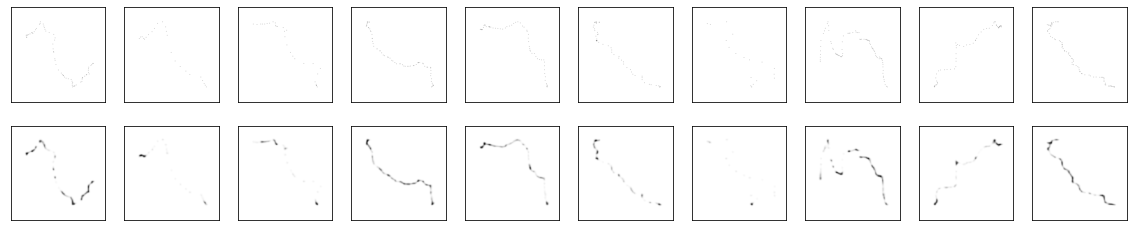

In [23]:
import matplotlib.pyplot as plt

n = 10  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(432 , 432))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 데이터
    ax = plt.subplot( 2, n, i + 1 + n )
    plt.imshow( decoded_imgs[i].reshape( 432, 432 ) )
    plt.gray()
    ax.get_xaxis().set_visible( False )
    ax.get_yaxis().set_visible( False )
plt.show()